In [130]:
# Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

ModuleNotFoundError: No module named 'folium'

In [109]:
# Read Mapbox API Key
load_dotenv()
mapbox_api = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox_api)

In [110]:
# Import geocodes for Florida counties
geocodes = Path("lat_long.csv")
geocodes_df = pd.read_csv(geocodes, index_col = 'County')
geocodes_df.sort_index(ascending = True, inplace = True)
geocodes_df.head(10)

,Lat,Long
County,,
Alachua,29.676436,-82.379953
Baker,30.287517,-82.236268
Bay,30.219170,-85.638788
Bevard,28.083333,-80.608333
Bradford,29.928876,-82.142368
Broward,26.134788,-80.206098
Calhoun,30.428611,-85.186786
Charlotte,26.952873,-82.131242
Citrus,28.894637,-82.469163


In [111]:
# Import Median Home Prices for Florida counties
median = Path("median_home_value.xlsx")
#median_df = pd.read_csv(median, index_col = 'County') 
median_df = pd.read_excel(median, index_col = 'County')              
median_df.sort_index(ascending = True, inplace = True)
median_df.head(10)

,Unnamed: 0,Median Home Price Q1 2021,Unnamed: 3,Unnamed: 4
County,,,,
Alachua,1,237288,NaN,NaN
Baker,2,151241,NaN,NaN
Bay,3,220032,NaN,NaN
Bevard,5,252790,NaN,NaN
Bradford,4,120402,NaN,NaN
Broward,6,327349,NaN,NaN
Calhoun,7,92366,NaN,NaN
Charlotte,8,250482,NaN,NaN
Citrus,9,169954,NaN,NaN


In [112]:
# Change values from string to float, remove $
median_df[median_df.columns[1:]] = median_df[median_df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
median_df.head(10)

,Unnamed: 0,Median Home Price Q1 2021,Unnamed: 3,Unnamed: 4
County,,,,
Alachua,1,237288.0,NaN,NaN
Baker,2,151241.0,NaN,NaN
Bay,3,220032.0,NaN,NaN
Bevard,5,252790.0,NaN,NaN
Bradford,4,120402.0,NaN,NaN
Broward,6,327349.0,NaN,NaN
Calhoun,7,92366.0,NaN,NaN
Charlotte,8,250482.0,NaN,NaN
Citrus,9,169954.0,NaN,NaN


In [113]:
#Drop unused columns from Median Home Values DataFrame 
median_df=median_df.drop(columns=["Unnamed: 0","Unnamed: 3","Unnamed: 4"])
median_df.head()

,Median Home Price Q1 2021
County,
Alachua,237288.0
Baker,151241.0
Bay,220032.0
Bevard,252790.0
Bradford,120402.0


In [114]:
# Reset Index in Median Home Values DataFrame
median_reset_df = median_df.reset_index()
median_reset_df

,County,Median Home Price Q1 2021
0,Alachua,237288.0
1,Baker,151241.0
2,Bay,220032.0
3,Bevard,252790.0
4,Bradford,120402.0
...,...,...
61,Union,128661.0
62,Volusia,228766.0
63,Wakulla,153639.0
64,Walton,265362.0


In [116]:
# Reset Index in Geocodes DataFrame
geocodes_reset_df = geocodes_df.reset_index()
geocodes_reset_df

,County,Lat,Long
0,Alachua,29.676436,-82.379953
1,Baker,30.287517,-82.236268
2,Bay,30.219170,-85.638788
3,Bevard,28.083333,-80.608333
4,Bradford,29.928876,-82.142368
...,...,...,...
61,Union,30.028050,-82.367222
62,Volusia,29.049037,-81.138947
63,Wakulla,30.144620,-84.366174
64,Walton,30.637995,-86.155962


In [118]:
#Remove blank space from Index in Median Home Values DataFrame
median_reset_df['County'] = median_reset_df['County'].str.strip()
#median_reset_df['County'][5]

In [150]:
#Merge Median Home Values DataFrame with Geocodes DataFrame
combined_df=geocodes_reset_df.merge(median_reset_df,how='inner',on='County' )
combined_df

,County,Lat,Long,Median Home Price Q1 2021
0,Alachua,29.676436,-82.379953,237288.0
1,Baker,30.287517,-82.236268,151241.0
2,Bay,30.219170,-85.638788,220032.0
3,Bevard,28.083333,-80.608333,252790.0
4,Bradford,29.928876,-82.142368,120402.0
...,...,...,...,...
61,Union,30.028050,-82.367222,128661.0
62,Volusia,29.049037,-81.138947,228766.0
63,Wakulla,30.144620,-84.366174,153639.0
64,Walton,30.637995,-86.155962,265362.0


In [122]:
#Concat Median Home Vale with geocodes
#median_geo_df= pd.concat([geocodes_df, median_df], axis=0, join="inner")
#median_geo_df= pd.concat([geocodes_reset_df, median_reset_df], axis="columns", join="inner")
# test for repo 

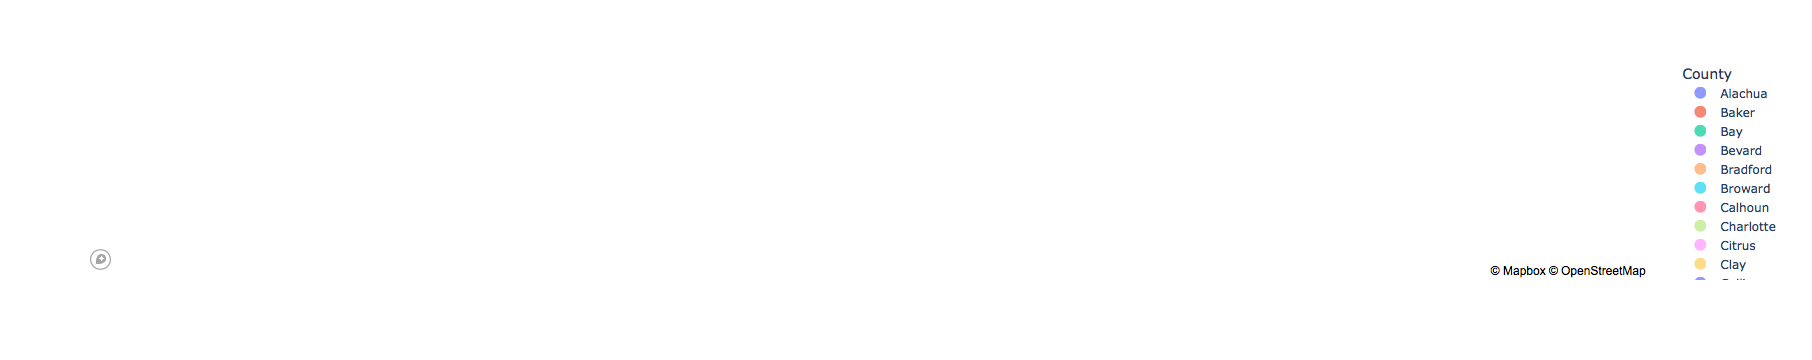

In [158]:
fig = px.scatter_mapbox(combined_df, lat="Lat", lon="Long", color="County", size="Median Home Price Q1 2021", hover_name='Median Home Price Q1 2021', hover_data=['Median Home Price Q1 2021'], zoom=5)
fig.update_layout(mapbox_style="light")
fig.show()